# Exploring 2019-2020 Software Developer Demographics and Tech Trends with Python

## About dataset

### Context

Stack Overflow is a popular website for developers. In 2019, an online survey was filled by 88,883 Stack Overflow users.

### Data availability

The original dataset is available on https://insights.stackoverflow.com/survey under a ODbL: Open Database License. 

## Aims of the project 

Herein, in the scope of this project, it is set out to elucidate the demograpics and tech trends of the software developer community by addressing the following questions:

* What is the distribution of gender among the participants and what percentage of participants identify as male, female, and non-binary/genderqueer/gender non-conforming, respectively?
* What is the range of ages for the participants in the survey, and can you identify any specific age group that constitutes the majority of the participants?
* What insights can be drawn about the educational diversity within the study cohort?
* What are the top five countries with the highest number of participants in the survey?
* What were the prevailing programming trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?
* What were the prevailing database trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?
* What were the prevailing platform trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?
* What were the prevailing web frame trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?

### Step-1: Installing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import folium

### Step-2: Loading the dataset

In [2]:
df =  pd.read_csv('survey_results_public.csv')

### Step-3: Exploring the dataset

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
print('The number of rows in the dataset:', df.shape[0])
print('The number of columns in the dataset:', df.shape[1])

The number of rows in the dataset: 88883
The number of columns in the dataset: 85


In [5]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


### Step-4: Data wrangling

#### Step-4.1: Discarding the columns that are not of interest

In [6]:
df_relevant = df[['Respondent','LanguageWorkedWith', 'DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith',
                 'LanguageDesireNextYear', 'DatabaseDesireNextYear', 'PlatformDesireNextYear', 'WebFrameDesireNextYear',
                 'Gender', 'Country', 'Age', 'EdLevel']]
df = df_relevant
df

,Respondent,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,LanguageDesireNextYear,DatabaseDesireNextYear,PlatformDesireNextYear,WebFrameDesireNextYear,Gender,Country,Age,EdLevel
0,1,HTML/CSS;Java;JavaScript;Python,SQLite,MacOS;Windows,Django;Flask,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,MySQL,Android;Arduino;Windows,Flask;jQuery,Man,United Kingdom,14.0,Primary/elementary school
1,2,C++;HTML/CSS;Python,NaN,Windows,Django,C++;HTML/CSS;JavaScript;SQL,MySQL,Windows,Django,Man,Bosnia and Herzegovina,19.0,"Secondary school (e.g. American high school, G..."
2,3,HTML/CSS,PostgreSQL,NaN,NaN,Elixir;HTML/CSS,PostgreSQL,NaN,Other(s):,Man,Thailand,28.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
3,4,C;C++;C#;Python;SQL,MySQL;SQLite,Linux;Windows,NaN,C;C#;JavaScript;SQL,MySQL;SQLite,Linux;Windows,NaN,Man,United States,22.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Android;Linux;MacOS;Slack;Windows,Django;Express;Flask;jQuery;React.js;Spring,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Docker;Kubernetes;Linux;Slack,Flask;jQuery;React.js;Spring,Man,Ukraine,30.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,HTML/CSS;JavaScript;Other(s):,Firebase;SQLite,Linux,jQuery,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,Firebase;MySQL;SQLite,Google Cloud Platform;Linux,jQuery;Vue.js,Man,Canada,NaN,Primary/elementary school
88879,88601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step-4.2: Removing duplicates, if any

In [7]:
dup_count = df.duplicated().sum()
if dup_count == 0 :
    print('No duplicates is the dataset!')
else :
    print('There are ',dup_count,' duplicates.')
    df.drop_duplicates(inplace=True)

No duplicates is the dataset!


#### Step-4.3: Spotting missing entries in the dataset

In [8]:
cols = df.columns
for col in cols : 
    print('The number of missing entries in', col, 'is:',df[col].isnull().sum())

The number of missing entries in Respondent is: 0
The number of missing entries in LanguageWorkedWith is: 1314
The number of missing entries in DatabaseWorkedWith is: 12857
The number of missing entries in PlatformWorkedWith is: 8169
The number of missing entries in WebFrameWorkedWith is: 23861
The number of missing entries in LanguageDesireNextYear is: 4795
The number of missing entries in DatabaseDesireNextYear is: 19736
The number of missing entries in PlatformDesireNextYear is: 11440
The number of missing entries in WebFrameDesireNextYear is: 25939
The number of missing entries in Gender is: 3477
The number of missing entries in Country is: 132
The number of missing entries in Age is: 9673
The number of missing entries in EdLevel is: 2493


In [9]:
for col in cols :
    if df[col].isnull().sum()*100/df.shape[0] >= 25 :
        print(df[col].isnull().sum()*100/df.shape[0],'% of', col, 'is missing')

26.845403507982404 % of WebFrameWorkedWith is missing
29.183308394181115 % of WebFrameDesireNextYear is missing


#### Step-4.4: If there is more than one entry in the same column, splitting the columns into multiple columns

In [10]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]

#### Step-4.5: Removing missing rows in columns containing more than 25% of missing entries

In [11]:
wfww_df=split_multicolumn(df.WebFrameWorkedWith)

In [12]:
wfdny = split_multicolumn(df.WebFrameDesireNextYear)

In [13]:
df.dropna(subset=['WebFrameWorkedWith','WebFrameDesireNextYear'],inplace=True)
if df['WebFrameWorkedWith'].isnull().sum() == 0 and df['WebFrameDesireNextYear'].isnull().sum() == 0 :
    print('It is done!')

It is done!


#### Step-4.6: Imputation of missing entries

#### Step-4.6.1: Mode imputation of missing entries in DatabaseDesireNextYear column

In [14]:
ddny=split_multicolumn(df.DatabaseDesireNextYear)
df_ddny=pd.DataFrame(ddny.sum().sort_values(ascending=False))
df_ddny.iloc[0]=df_ddny.iloc[0] + df['DatabaseDesireNextYear'].isnull().sum()
df_ddny.columns=['DatabaseDesireNextYear']

#### Step-4.6.2: Mode imputation of missing entries in DatabaseWorkedWith column

In [15]:
ddww=split_multicolumn(df.DatabaseWorkedWith)
df_ddww=pd.DataFrame(ddww.sum().sort_values(ascending=False))
df_ddww.iloc[0]=df_ddww.iloc[0] + df['DatabaseWorkedWith'].isnull().sum()
df_ddww.columns = ['DatabaseWorkedWith']

#### Step-4.6.3: Mode imputation of missing entries in PlatformDesireNextYear column 

In [16]:
pdny=split_multicolumn(df.PlatformDesireNextYear)
df_pdny=pd.DataFrame(pdny.sum().sort_values(ascending=False))
df_pdny.iloc[0]=df_pdny.iloc[0] + df['PlatformDesireNextYear'].isnull().sum()
df_pdny.columns = ['PlatformDesireNextYear']

#### Step-4.6.4: Removing outliers in the Age columns

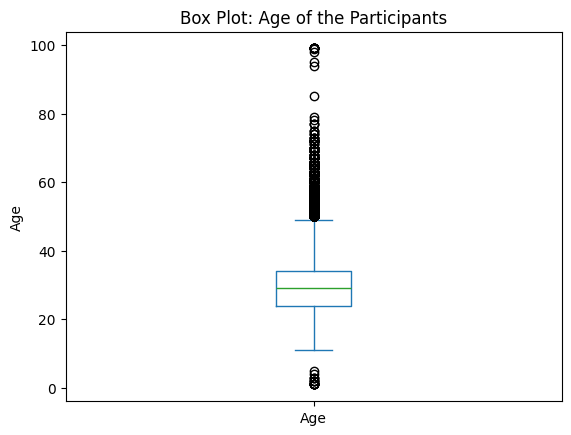

In [17]:
df['Age'].plot(kind='box')
plt.ylabel('Age')
plt.title('Box Plot: Age of the Participants')
plt.show()

In [18]:
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
lower_boundary = df['Age'].quantile(0.25) - 1.5*iqr
upper_boundary = df['Age'].quantile(0.75) + 1.5*iqr
df = df[(df['Age'] > lower_boundary) & (df['Age'] < upper_boundary)]
if df['Age'].isnull().sum() == 0 :
    print('No missing entry!')

No missing entry!


#### Step-4.6.5: Mode imputation of the PlatformWorkedWith column

In [19]:
pww = split_multicolumn(df.PlatformWorkedWith)
df_pww=pd.DataFrame(pww.sum().sort_values(ascending=False))
df_pww.iloc[0]=df_pww.iloc[0] + df['PlatformWorkedWith'].isnull().sum()
df_pww.columns = ['PlatformWorkedWith']

#### Step-4.6.6: Mode imputation of the LanguageDesireNextYear column

In [20]:
ldny = split_multicolumn(df.LanguageDesireNextYear)
df_ldny=pd.DataFrame(ldny.sum().sort_values(ascending=False))
df_ldny.iloc[0]=df_ldny.iloc[0] + df['LanguageDesireNextYear'].isnull().sum()
df_ldny.columns = ['LanguageDesireNextYear']

#### Step-4.6.7: Mode imputation of the Gender column 


In [21]:
df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace=True)

#### Step-4.6.8: Mode imputation of the EdLevel column 



In [22]:
df['EdLevel'].fillna(df['EdLevel'].value_counts().index[0], inplace=True)

#### Step-4.6.9: Mode imputation of the LanguageWorkedWith 

In [23]:
lww = split_multicolumn(df.LanguageWorkedWith)
df_lww=pd.DataFrame(lww.sum().sort_values(ascending=False))
df_lww.iloc[0]=df_lww.iloc[0] + df['LanguageWorkedWith'].isnull().sum()
df_lww.columns = ['LanguageWorkedWith']

## Analysis of the cleansed dataset

## 1. Analyzing the demographics of the participants

### 1.1 What is the distribution of gender among the participants and what percentage of participants identify as male, female, and non-binary/genderqueer/gender non-conforming, respectively?

['Man', 'Woman', 'Non-binary, gendeerqueer, or gender non-conforming']


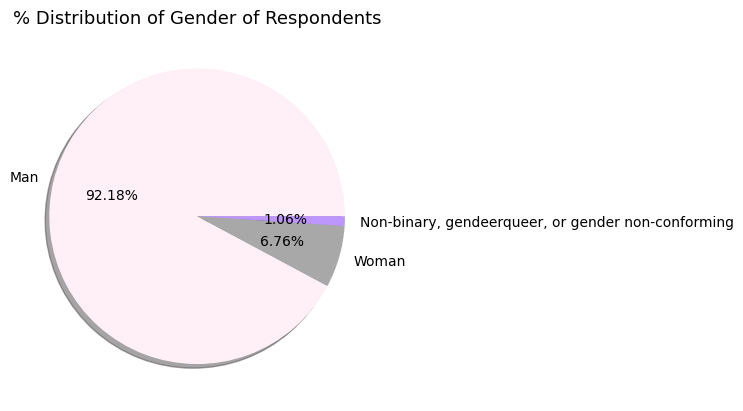

In [24]:
gender_dict={'Gender':['Man', 'Woman', 'Non-binary, gendeerqueer, or gender non-conforming'],'NumberOfParticipants':[df['Gender'].value_counts().iloc[0:1],df['Gender'].value_counts().iloc[1:2],df['Gender'].value_counts().iloc[2:].sum()]}
df_gender = pd.DataFrame(gender_dict)
df_gender.NumberOfParticipants.astype(float)
fig, ax = plt.subplots()
print(df_gender['Gender'].to_list())
ax.pie(df_gender['NumberOfParticipants'], labels=df_gender['Gender'].to_list(),autopct='%1.2f%%', shadow=True,colors=['#fff0f7','#a8a8a8','#be95ff'])
ax.set_title('% Distribution of Gender of Respondents', fontsize='13')
plt.show()

* The pie chart show that percetange distribution of participants' gender.

* 92.18% of participants are male, whereas 6.76% and 1.06% of participants, in seriatim, are woman and non-binary/gendeerquer/gender non-conforming
 


### 1.2 What is the range of ages for the participants in the survey, and can you identify any specific age group that constitutes the majority of the participants?

In [25]:
df['Age'].describe()

count    49937.000000
mean        29.206260
std          6.829492
min         11.000000
25%         24.000000
50%         28.000000
75%         34.000000
max         48.000000
Name: Age, dtype: float64

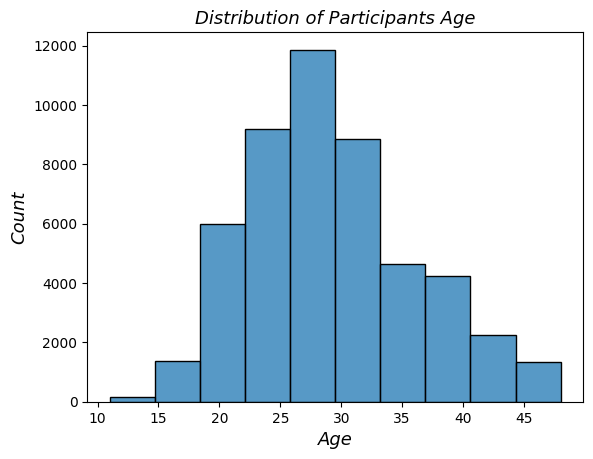

In [26]:
sns.histplot(data=df['Age'], bins=10)
plt.xlabel('Age', fontsize='13',style='italic')
plt.ylabel('Count', fontsize='13',style='italic')
plt.title('Distribution of Participants Age', fontsize='13', style='italic')
plt.show()

* The participants' age ranges between 11 and 48. The mean of the participant's age is 29.21 with a standard deviation of 6.83.

* The histogram shows the distribution of respondents based on age. 

* The majority of participants are between 25 and 30 years old.

### 1.3 What insights can be drawn about the educational diversity within the study cohort?

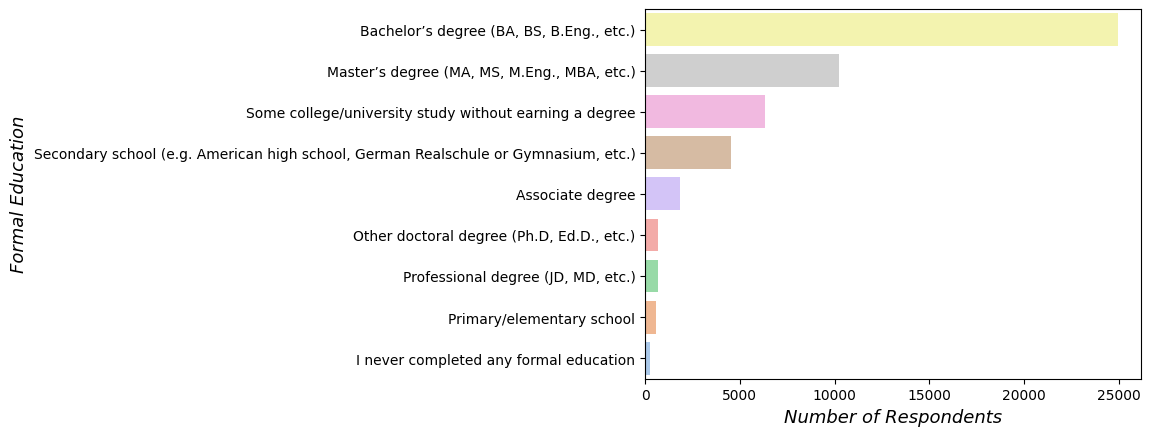

In [27]:
df_edLev=pd.DataFrame(df['EdLevel'].value_counts().sort_values(ascending=False))
df_edLev.reset_index(inplace=True)
sns.barplot(data=df_edLev.head(10),y='EdLevel',x='count', orient='h', palette='pastel', hue='count')
plt.xlabel('Number of Respondents', style='italic', fontsize='13')
plt.ylabel('Formal Education', style='italic', fontsize='13')
plt.legend([],[],frameon=False)


* The row chart illustrates the distribution of participants based on their formal education.

* 25,188 of the participants, which corresponds to 49.78% of the participants, hold a BSc degree. Participants with BSc dominate the survey. 

* When the education level goes higher, the number of participants diminishes. This indicates that the software development community is not appealing to highly qualified people.


### 1.4 What are the top five countries with the highest number of participants in the survey?

In [28]:
df_country=pd.DataFrame(df['Country'].value_counts())
df_country.reset_index(inplace=True)
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_country['count'].min(),
                              df_country['count'].max(),
                              9, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_country,
    columns=['Country', 'count'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    nan_fill_color = 'white',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Participants',
    reset=True
)
world_map

* The US (11475 participants), India (4967 participants), the UK (3203 participants), Germany (3172 participants), and Canada (1838 participants) are the top 5 countries where participants are based. 

### 2. Analysis of tech trends

### 2.1 What were the prevailing programming trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?

In [29]:
df_lww.reset_index(inplace=True)
df_lww=df_lww.rename(columns={'index':'Language'})
df_top10lang = df_lww.sort_values(by='LanguageWorkedWith',ascending=False).head(10)
df_ldny.reset_index(inplace=True)
df_ldny.rename(columns={'index':'Language'}, inplace=True)
df_top10lang_ny = df_ldny.sort_values(by='LanguageDesireNextYear',ascending=False).head(10)


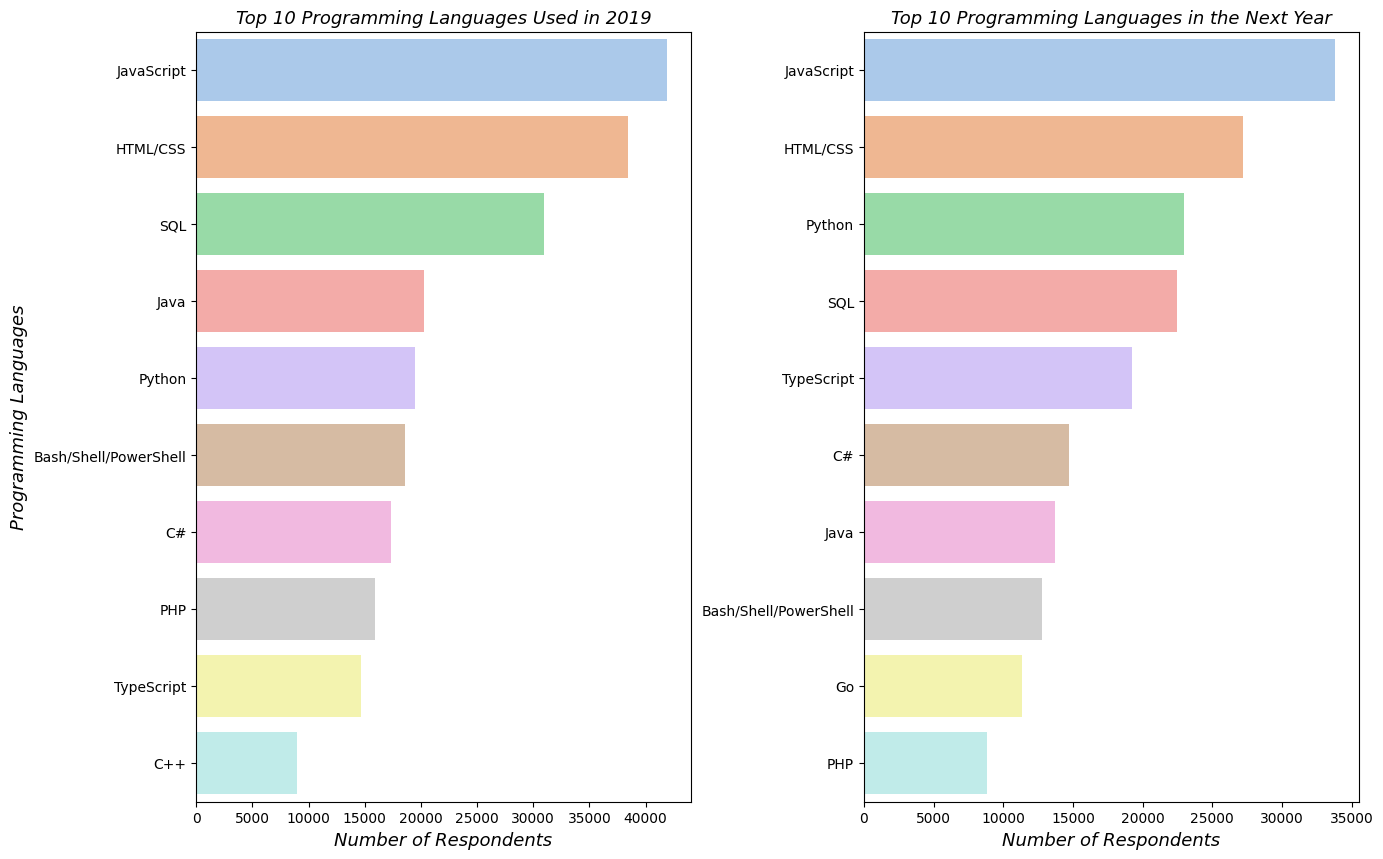

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15, 10))
plt.subplots_adjust(wspace=0.35)
sns.barplot(ax=ax[0], data=df_top10lang, x='LanguageWorkedWith', y='Language', orient='h',palette='pastel', hue='Language')
ax[0].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[0].set_ylabel('Programming Languages', fontsize='13', style='italic')
ax[0].set_title('Top 10 Programming Languages Used in 2019', fontsize='13', style='italic')

sns.barplot(ax=ax[1], data=df_top10lang_ny, x='LanguageDesireNextYear', y='Language', orient='h',palette='pastel', hue='Language')
ax[1].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[1].set_ylabel('', fontsize='13', style='italic')


ax[1].set_title('Top 10 Programming Languages in the Next Year', fontsize='13', style='italic')
ax[0].legend([],[],frameon=False)
ax[1].legend([],[],frameon=False)
plt.show()

* The left row chart depicts the top 10 most popular programming languages in 2019, while the right row chart illustrates the anticipated 10 most popular programming languages for the upcoming year.

* The 10 most popular programming languages in 2019, listed in descending order, are JavaScript, HTML/CSS, SQL, Java, Python, Bash/Shell/Power Shell, C#, PHP, TypeScript, and C++.

* In descending order, the projected top 10 programming languages for the next year are JavaScript, HTML/CSS, Python, SQL, TypeScript, C#, Java, Bash/Shell/Power Shell, Go, and PHP.

* Python is expected to gain popularity, moving from the 5th to the 3rd rank, while JavaScript and HTML/CSS maintain their dominance in the 1st and 2nd ranks, respectively.

* C++ is not expected to be among the top 10 programming languages in the coming year, whereas Go is anticipated to secure a spot.

* TypeScript is projected to climb from the 9th rank to the 5th rank in the next year.

* Java experiences a decline in popularity, evident from its drop in rank from 4th to 7th in the upcoming year.

### 2.2 What were the prevailing database trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?

In [31]:
df_ddww.reset_index(inplace=True)
df_ddww.rename(columns={'index':'DB'}, inplace=True)
df_top10db = df_ddww.sort_values(by='DatabaseWorkedWith',ascending=False).head(10)
df_ddny.reset_index(inplace=True)
df_ddny.rename(columns={'index':'DB'}, inplace=True)
df_top10db_ny = df_ddny.sort_values(by='DatabaseDesireNextYear', ascending=False).head(10)

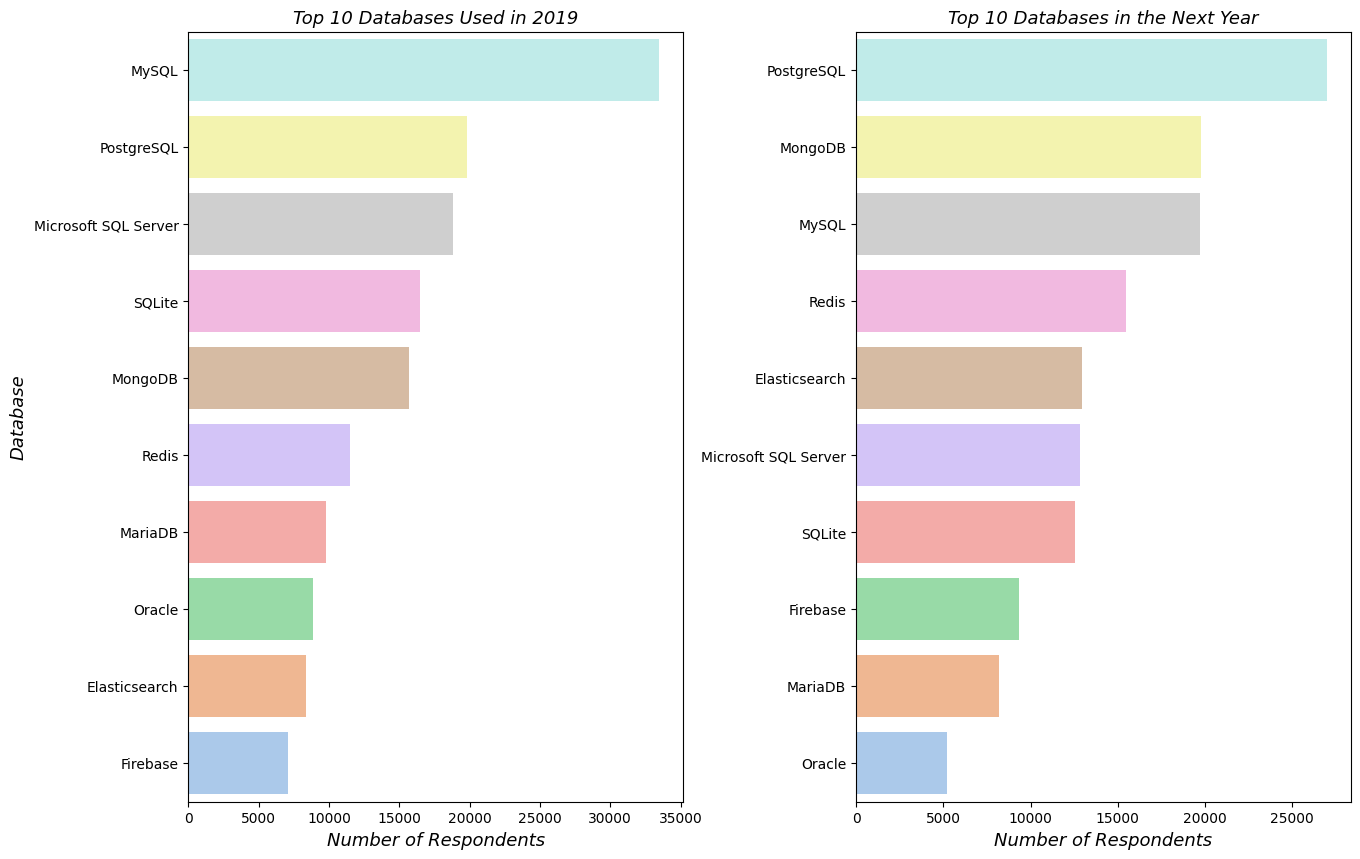

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15, 10))
plt.subplots_adjust(wspace=0.35)
sns.barplot(ax=ax[0], data=df_top10db, x='DatabaseWorkedWith', y='DB', orient='h',palette='pastel', hue='DatabaseWorkedWith')
ax[0].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[0].set_ylabel('Database', fontsize='13', style='italic')
ax[0].set_title('Top 10 Databases Used in 2019', fontsize='13', style='italic')

sns.barplot(ax=ax[1], data=df_top10db_ny, x='DatabaseDesireNextYear', y='DB', orient='h',palette='pastel', hue='DatabaseDesireNextYear')
ax[1].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[1].set_ylabel('', fontsize='13', style='italic')


ax[1].set_title('Top 10 Databases in the Next Year', fontsize='13', style='italic')
ax[0].legend([],[],frameon=False)
ax[1].legend([],[],frameon=False)
plt.show()

* The left row chart depicts the top 10 most popular databases in 2019, while the right row chart illustrates the anticipated 10 most popular databases for the upcoming year.

* The top 10 most preferred databases in 2019, ranked in descending order, include MySQL, PostgreSQL, Microsoft SQL Server, SQLite, MongoDB, Redis, MariaDB, Oracle, Elasticsearch, and Firebase.

* The expected top 10 databases for the next year are PostgreSQL, MongoDB, MySQL, Redis, Elasticsearch, Microsoft SQL Server, SQLite, Firebase, MariaDB, and Oracle.

* The shifts in popularity clearly indicate a significant evolution in database preferences.

### 2.3 What were the prevailing platform trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?

In [33]:
df_top5wp=df_pww.head(5)
df_top5wp.reset_index(inplace=True)
df_top5wp.rename(columns={'index':'Platform'}, inplace=True)
df_top5pny=df_pdny.head(5)
df_top5pny.reset_index(inplace=True)
df_top5pny.rename(columns={'index':'Platform'},inplace=True)

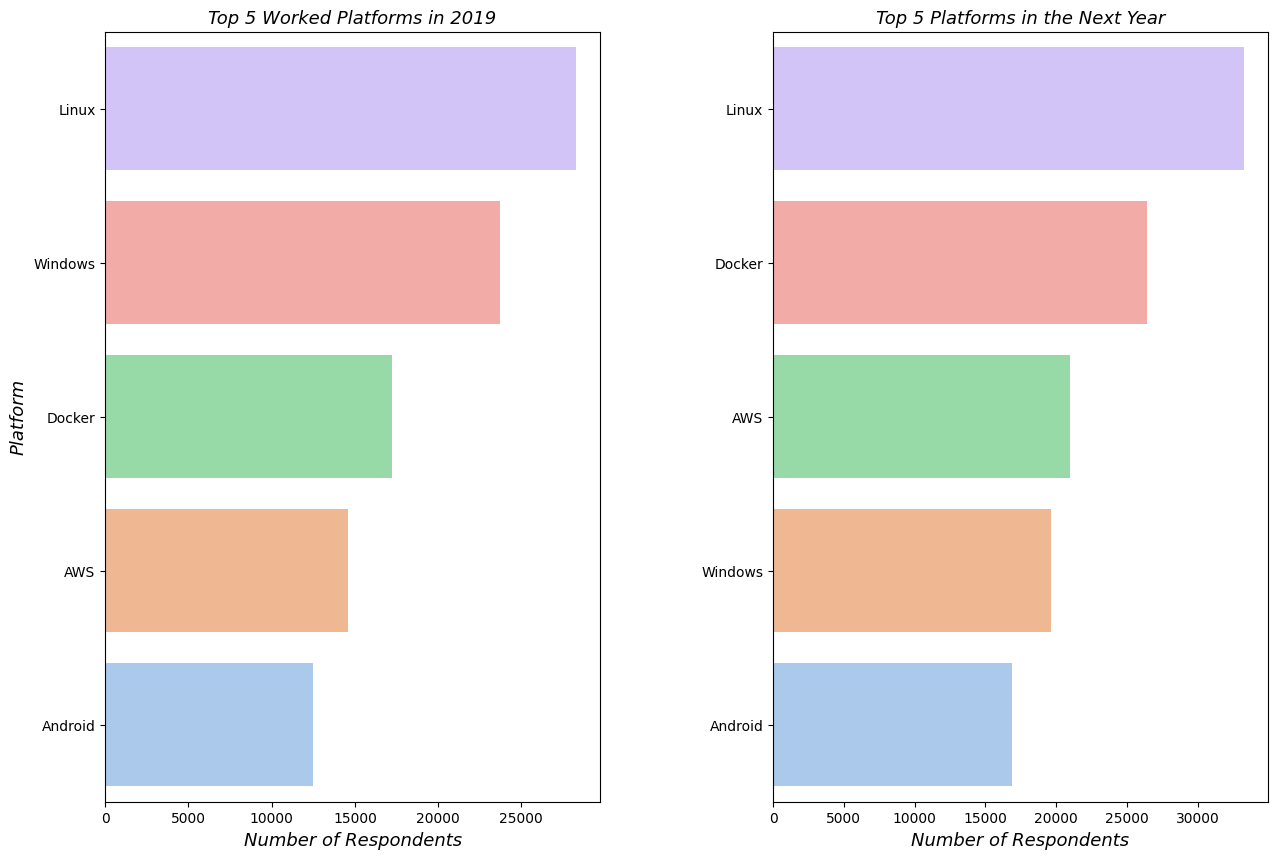

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15, 10))
plt.subplots_adjust(wspace=0.35)
sns.barplot(ax=ax[0], data=df_top5wp, x='PlatformWorkedWith', y='Platform', orient='h', hue='PlatformWorkedWith', palette='pastel')
ax[0].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[0].set_ylabel('Platform', fontsize='13', style='italic')
ax[0].set_title('Top 5 Worked Platforms in 2019', fontsize='13', style='italic')

sns.barplot(ax=ax[1], data=df_top5pny, x='PlatformDesireNextYear', y='Platform', orient='h', hue='PlatformDesireNextYear', palette='pastel')
ax[1].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[1].set_ylabel('', fontsize='13', style='italic')

ax[1].set_title('Top 5 Platforms in the Next Year', fontsize='13', style='italic')
ax[0].legend([],[],frameon=False)
ax[1].legend([],[],frameon=False)
plt.show()

* The left row chart illustrates the top 5 most popular platforms in 2019, while the right row chart showcases the anticipated 5 most popular platforms for the upcoming year.
* The top 5 platforms in 2019, ranked in descending order, include Linux, Windows, Docker, AWS, and Android. 
* The expected rankings for the next year, in descending order, are Linux, Docker, AWS, Windows, and Android.
* Linux maintains its popularity as the 1st ranked platform, while Windows experiences a decline in popularity, moving from the 2nd to the 4th rank.
* Popularit of AWS is expected to be increased in the next year. 
* Android maintains its position in the same rank.

### 2.4 What were the prevailing web frame trends within the developer community in 2019, and what shifts or emerging trends are anticipated for the upcoming year?

In [35]:
wfww=split_multicolumn(df.WebFrameWorkedWith)
df_wfww = pd.DataFrame(wfww.sum().sort_values(ascending=False))
df_top5wfww=df_wfww.head(5)
df_top5wfww.reset_index(inplace=True)
df_top5wfww.columns = ['WebFrame','WebFameWorkedWith']

wfny=split_multicolumn(df.WebFrameDesireNextYear)
df_wfny = pd.DataFrame(wfny.sum().sort_values(ascending=False))
df_top5wfny=df_wfny.head(5)
df_top5wfny.reset_index(inplace=True)
df_top5wfny.columns = ['WebFrame', 'WebFrameDesireNextYear']

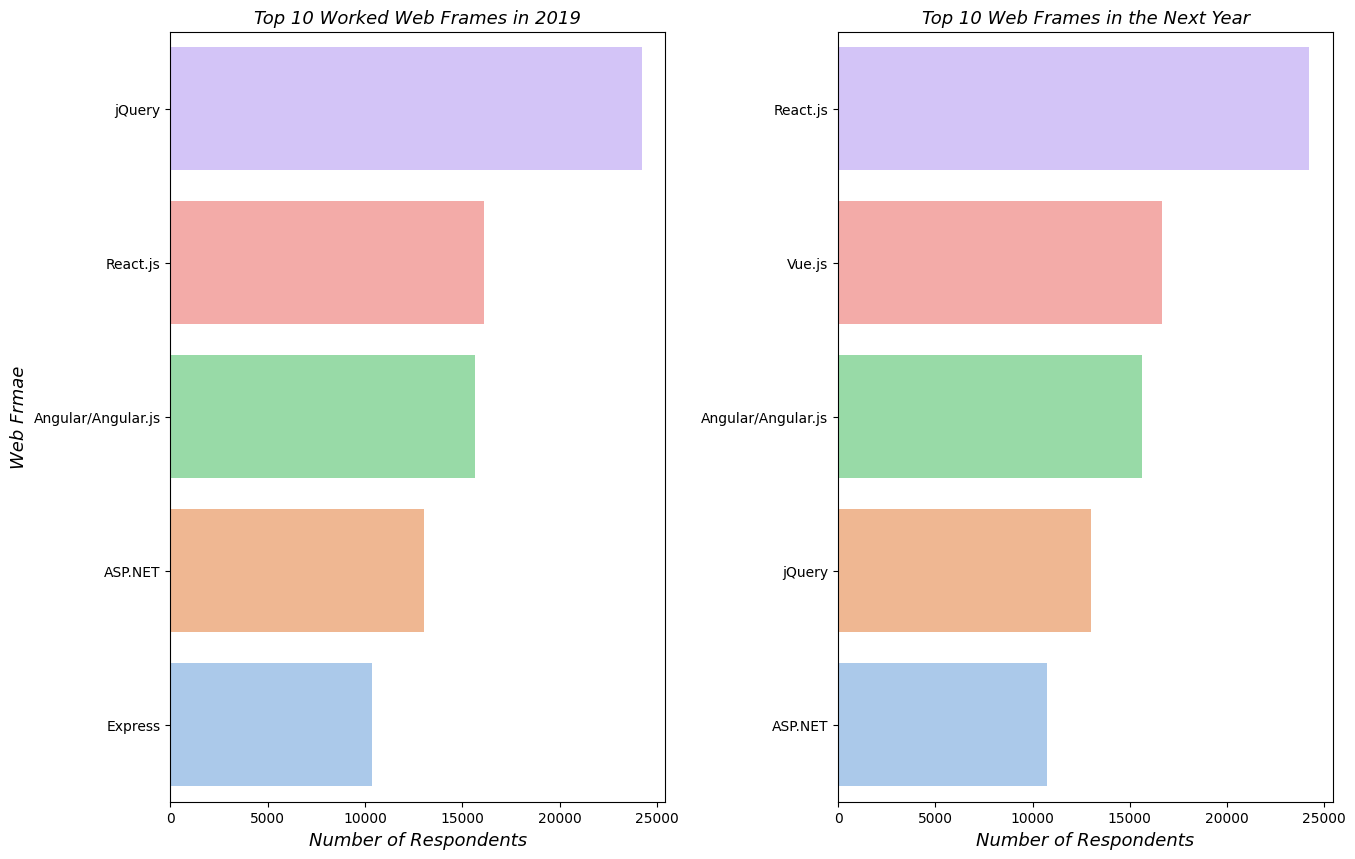

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15, 10))
plt.subplots_adjust(wspace=0.35)
sns.barplot(ax=ax[0], data=df_top5wfww, x='WebFameWorkedWith', y='WebFrame', orient='h', hue='WebFameWorkedWith', palette='pastel')
ax[0].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[0].set_ylabel('Web Frmae', fontsize='13', style='italic')
ax[0].set_title('Top 10 Worked Web Frames in 2019', fontsize='13', style='italic')

sns.barplot(ax=ax[1], data=df_top5wfny, x='WebFrameDesireNextYear', y='WebFrame', orient='h', hue='WebFrameDesireNextYear', palette='pastel')
ax[1].set_xlabel('Number of Respondents', fontsize='13', style='italic')
ax[1].set_ylabel('', fontsize='13', style='italic')

ax[1].set_title('Top 10 Web Frames in the Next Year', fontsize='13', style='italic')
ax[0].legend([],[],frameon=False)
ax[1].legend([],[],frameon=False)
plt.show()

* The left row chart illustrates the top 5 most popular web frames in 2019, while the right row chart showcases the anticipated 5 most popular web frames for the upcoming year.
* The top 5 web frames used in 2019, listed in descending order, are jQuery, React.js, Angular/Angular.js, ASP.NET, and Express. 
* In the next year, the most desired top 5 web frames are expected to be React.Js, Vue.js, Angular/Angular.js, jQuery, and ASP.NET.
* jQuery experiences a decline in popularity in the upcoming year, evidenced by its drop from the 1st to the 4th rank. 
* React.js is anticipated to secure the first rank among web frames in the next year.
* Vue.js gains increased interest from participants, securing the second rank in the upcoming year.

## Summary

In the context of this project, our objective is to create detailed profiles of participants based on gender, age, formal education level, and home countries. Additionally, we aim to highlight trends related to the top 10 programming languages, databases, platforms, and web frameworks that participants prefer.

To achieve these goals, the original dataset was streamlined to align with the specified objectives. Any missing entries were addressed through either mode/median imputation or removal. The analysis reveals a predominant male participation, with a significant number holding a Bachelor's degree as their highest formal education level. The majority of participants are identified from key countries such as the United States, India, the United Kingdom, Germany, and Canada.

An in-depth examination of programming language, database, platform, and web framework preferences indicates notable shifts in trends. This information serves as a valuable guide for companies, assisting them in adjusting their skill requirements during the recruitment phase and influencing the career development opportunities for existing employees.